# MOVIE RECOMMENDATION SYSTEM

## Overview

Developing a movie recommendation system to improve the user experience in the entertainment industry. By leveraging historical data , our project aims to enhance customer satisfaction by providing personalized movie suggestions, fostering engagement, and driving user retention

## <small> Business Understanding</small>

### <small>  Problem Statement</small>

With so many movie alternatives available nowadays, people find it difficult to choose films that suit their tastes due to information overload. Manual searches take a lot of time, which causes decision fatigue and lowers user engagement on a platform. A customized movie recommendation system that makes use of user-specific information and collaborative filtering methods will address this. By creating an effective recommendation engine that smoothly connects with user profiles, this project seeks to improve user satisfaction and retention by enabling a more efficient and enjoyable exploration of the extensive movie catalogs.

**OBJECTIVES**

Main objective:

* To provide personalized movie recommendations tailored to individual user preferences. 

Specific objectives:

* To find the most popular movies by genre 
* To build a recommendation system that scales efficiently with a growing user base and an expanding movie catalog.
* To provide near-real-time movie recommendations based on user interactions

##  Reading the data

In [57]:
# Importing the necessary libraries 
import pandas as pd # For data manipulation and analysis
import numpy as np # For numerical operations and array manipulation
import matplotlib.pyplot as plt #Data Visualisation
%matplotlib inline
import warnings
import seaborn as sns # for enhanced visualisation
warnings.filterwarnings("ignore")
import re

In [90]:
# Loading the datasets
links_data = pd.read_csv("links.csv")
tags_data = pd.read_csv("tags.csv")
movies_data = pd.read_csv("movies.csv")
ratings_data = pd.read_csv("ratings.csv")
# Preview the shape of the dataset
print('Dataframe shape {}'.format(links_data.shape))
print('Dataframe shape {}'.format(tags_data.shape))
print('Dataframe shape {}'.format(movies_data.shape))
print('Dataframe shape {}'.format(ratings_data.shape))

Dataframe shape (86537, 3)
Dataframe shape (2328315, 4)
Dataframe shape (86537, 3)
Dataframe shape (33832162, 4)


In [91]:
ratings_data.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [93]:
# Merge links_data and movies_data on 'movieId'
merged_df = pd.merge(links_data, movies_data, on='movieId', how='inner')

# Merge the result with tags_data on 'movieId'
merged_df = pd.merge(merged_df, tags_data, on='movieId', how='inner')

# Merge ratings_data with the existing merged_df on 'movieId'
ratings_data_sampled = ratings_data.sample(frac=0.1, random_state=42)

# Merge sampled ratings_data with the existing merged_df on 'movieId'
merged_df = pd.merge(merged_df, ratings_data_sampled, on='movieId', how='inner')

# Display the resulting DataFrame
print(merged_df)

MemoryError: Unable to allocate 22.1 GiB for an array with shape (2967130697,) and data type int64

In [60]:
#  Creating a class for exploring and analyzing Pandas DataFrames.
class DataExplorer:
    def __init__(self, data):
        """
        Initialize the DataExplorer class with a dataset.
        :param data: Pandas DataFrame
        """
        self.data = data
        
    def check_head(self, rows=5):
        """
        Display the first few rows of the dataset.
        :return: Pandas DataFrame showing the head of the dataset
        """
        return self.data.head(rows)
    
    def check_info(self):
        """
        Display information about the dataset (data types, memory usage, etc.).
        """
        return self.data.info()
    
    def check_describe(self):
        """
        Generate descriptive statistics of the dataset (count, mean, etc.).
        :return: Pandas DataFrame with descriptive statistics
        """
        return self.data.describe()
    

In [61]:
# Instatiating the class
explorer = DataExplorer(merged_df)

# Check the head of the dataset
print("Head of the dataset:")
print(explorer.check_head())

# Check dataset info
print("\nDataset info:")
explorer.check_info()

# Check dataset description
print("\nDataset statistics:")
print(explorer.check_describe())

Head of the dataset:
   movieId  imdbId  tmdbId             title  \
0        1  114709   862.0  Toy Story (1995)   
1        1  114709   862.0  Toy Story (1995)   
2        1  114709   862.0  Toy Story (1995)   
3        1  114709   862.0  Toy Story (1995)   
4        1  114709   862.0  Toy Story (1995)   

                                        genres  userId         tag   timestamp  
0  Adventure|Animation|Children|Comedy|Fantasy     499   animation  1422605756  
1  Adventure|Animation|Children|Comedy|Fantasy     499  friendship  1422605756  
2  Adventure|Animation|Children|Comedy|Fantasy     499        toys  1422605756  
3  Adventure|Animation|Children|Comedy|Fantasy    1114   animation  1147410824  
4  Adventure|Animation|Children|Comedy|Fantasy    1114      Disney  1147449942  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2328315 entries, 0 to 2328314
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   

# Data Cleaning

This section prepares the data for EDA and modeling. The dataset will be checked for:

- duplicated rows
- missing values
- extracting release year from title

In [62]:
# Checking for missing values in the dataset
merged_df.isnull().sum().T

movieId        0
imdbId         0
tmdbId       457
title          0
genres         0
userId         0
tag           17
timestamp      0
dtype: int64

In [63]:
# Function to extract the year from the title
def extract_year(title):
    match = re.search(r'\((\d{4})\)', title)
    return match.group(1) if match else None

# Apply the function to create a new 'year' column
merged_df['year'] = merged_df['title'].apply(extract_year)

# Remove the year from the 'title' column
merged_df['title'] = merged_df['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True)

# Display the updated DataFrame
print(merged_df.head())

   movieId  imdbId  tmdbId      title  \
0        1  114709   862.0  Toy Story   
1        1  114709   862.0  Toy Story   
2        1  114709   862.0  Toy Story   
3        1  114709   862.0  Toy Story   
4        1  114709   862.0  Toy Story   

                                        genres  userId         tag  \
0  Adventure|Animation|Children|Comedy|Fantasy     499   animation   
1  Adventure|Animation|Children|Comedy|Fantasy     499  friendship   
2  Adventure|Animation|Children|Comedy|Fantasy     499        toys   
3  Adventure|Animation|Children|Comedy|Fantasy    1114   animation   
4  Adventure|Animation|Children|Comedy|Fantasy    1114      Disney   

    timestamp  year  
0  1422605756  1995  
1  1422605756  1995  
2  1422605756  1995  
3  1147410824  1995  
4  1147449942  1995  


In [64]:
# Drop duplicate rows based on 'movieId' and keep the first occurrence
merged_df = merged_df.drop_duplicates(subset='movieId', keep='first')

In [65]:
# Checking the shape after droppping rows
merged_df.shape

(53452, 9)

In [66]:
# Split the genres column into a list of genres
merged_df['genres'] = merged_df['genres'].str.split('|')

# Display the updated DataFrame
print(merged_df.head())

      movieId  imdbId   tmdbId                        title  \
0           1  114709    862.0                    Toy Story   
1440        2  113497   8844.0                      Jumanji   
2093        3  113228  15602.0             Grumpier Old Men   
2129        4  114885  31357.0            Waiting to Exhale   
2142        5  113041  11862.0  Father of the Bride Part II   

                                                 genres  userId         tag  \
0     [Adventure, Animation, Children, Comedy, Fantasy]     499   animation   
1440                     [Adventure, Children, Fantasy]     499     animals   
2093                                  [Comedy, Romance]    9401      sequel   
2129                           [Comedy, Drama, Romance]   95828  characters   
2142                                           [Comedy]    1114      family   

       timestamp  year  
0     1422605756  1995  
1440  1412378107  1995  
2093  1354556170  1995  
2129  1360563411  1995  
2142  1147409796  199

In [67]:
merged_df['year'] = pd.to_datetime(merged_df['year'])
# Keeping the year only
merged_df['year'] = merged_df['year'].dt.year
# previewing the changes
merged_df.head()

,movieId,imdbId,tmdbId,title,genres,userId,tag,timestamp,year
0,1,114709,862.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",499,animation,1422605756,1995.0
1440,2,113497,8844.0,Jumanji,"[Adventure, Children, Fantasy]",499,animals,1412378107,1995.0
2093,3,113228,15602.0,Grumpier Old Men,"[Comedy, Romance]",9401,sequel,1354556170,1995.0
2129,4,114885,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",95828,characters,1360563411,1995.0
2142,5,113041,11862.0,Father of the Bride Part II,[Comedy],1114,family,1147409796,1995.0


In [68]:
# Drop the 'timestamp' column
merged_df = merged_df.drop('timestamp', axis=1)

In [69]:

merged_df.head()

,movieId,imdbId,tmdbId,title,genres,userId,tag,year
0,1,114709,862.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",499,animation,1995.0
1440,2,113497,8844.0,Jumanji,"[Adventure, Children, Fantasy]",499,animals,1995.0
2093,3,113228,15602.0,Grumpier Old Men,"[Comedy, Romance]",9401,sequel,1995.0
2129,4,114885,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",95828,characters,1995.0
2142,5,113041,11862.0,Father of the Bride Part II,[Comedy],1114,family,1995.0


In [70]:
#Reset the index to start from 0 and drop the existing index
merged_df = merged_df.reset_index(drop=True)
# previewing the changes
merged_df.head()

,movieId,imdbId,tmdbId,title,genres,userId,tag,year
0,1,114709,862.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",499,animation,1995.0
1,2,113497,8844.0,Jumanji,"[Adventure, Children, Fantasy]",499,animals,1995.0
2,3,113228,15602.0,Grumpier Old Men,"[Comedy, Romance]",9401,sequel,1995.0
3,4,114885,31357.0,Waiting to Exhale,"[Comedy, Drama, Romance]",95828,characters,1995.0
4,5,113041,11862.0,Father of the Bride Part II,[Comedy],1114,family,1995.0


# Explarotary Data Analysis

### Univariate Analysis

In [71]:
# checking summary stats for the dataset
summary_stats = merged_df.describe()
print(summary_stats)

             movieId        imdbId        tmdbId         userId          year
count   53452.000000  5.345200e+04  5.339200e+04   53452.000000  53189.000000
mean   124233.971301  1.914961e+06  1.776345e+05  138989.472312   1992.403580
std     73658.306819  3.167588e+06  2.010921e+05   88010.982970     26.114771
min         1.000000  1.000000e+00  2.000000e+00      10.000000   1874.000000
25%     71972.250000  7.986675e+04  3.247775e+04   47583.000000   1976.000000
50%    133705.500000  3.326850e+05  8.564100e+04  180920.000000   2002.000000
75%    175277.500000  2.344674e+06  2.787615e+05  215490.000000   2013.000000
max    288955.000000  2.798907e+07  1.146246e+06  330852.000000   2023.000000


In [78]:
# chacking values in tag column
tag_counts = merged_df['tag'].value_counts()
tag_counts

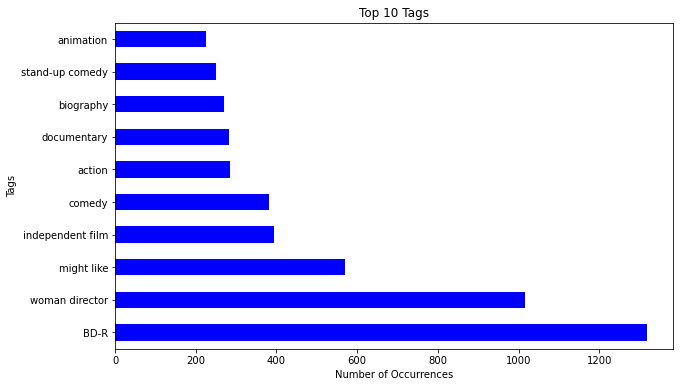

In [80]:
# Plot a bar chart for the top tags
top_tags = tag_counts.head(10)

plt.figure(figsize=(10, 6))
top_tags.plot(kind='barh', color='blue')
plt.title('Top 10 Tags')
plt.xlabel('Number of Occurrences')
plt.ylabel('Tags')
plt.show()

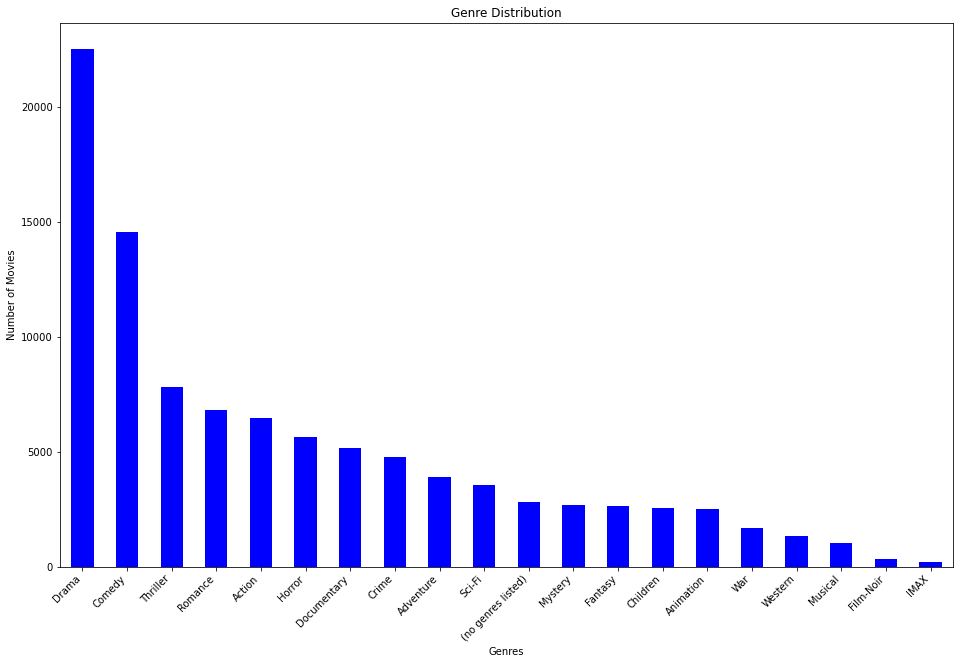

In [85]:
# Plot a bar chart for genre distribution
# Flatten the 'genres' lists
all_genres = [genre for genres_list in merged_df['genres'] for genre in genres_list]

genre_counts = pd.Series(all_genres).value_counts()

# plotting the distribution
plt.figure(figsize=(16, 10))
genre_counts.plot(kind='bar', color='blue')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()

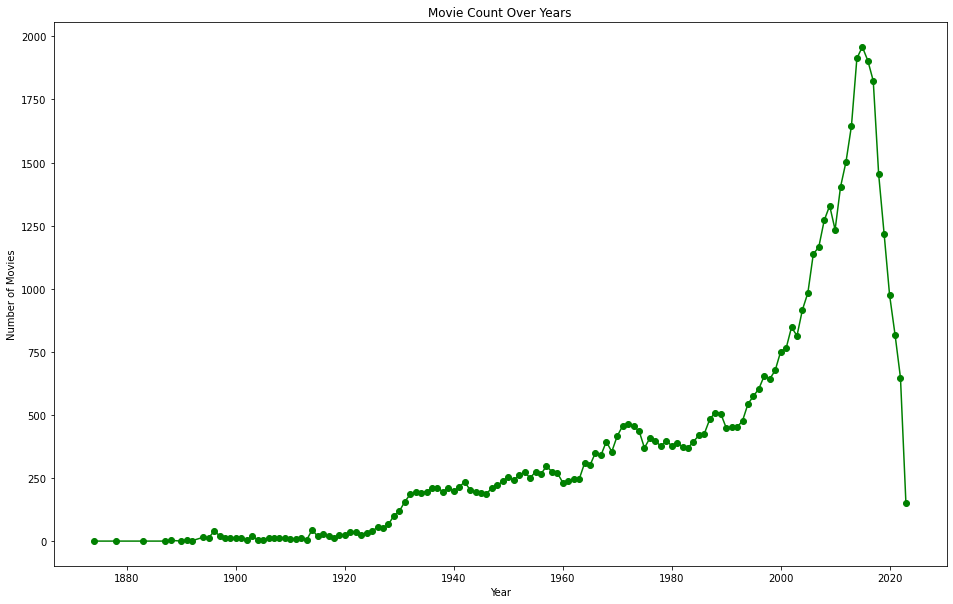

In [87]:
# Plot a line chart for movie count over the years
movie_count_per_year = merged_df['year'].value_counts().sort_index()

plt.figure(figsize=(16, 10))
movie_count_per_year.plot(kind='line', marker='o', color='green')
plt.title('Movie Count Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

# Bivariate Analysis

In [88]:
# Scatter plot for user ratings and movie genres
sns.scatterplot(x='user_rating', y='genres', data=merged_df)
plt.title('Relationship Between User Ratings and Movie Genres')
plt.show()

ValueError: Could not interpret value `user_rating` for parameter `x`